Import the necessary Dependencies.

In [2]:
import re
import numpy as np
import pandas as pd
#plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#nl
import nltk as nltk
from nltk.stem import WordNetLemmatizer
#sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report



In [4]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

ParseError: not well-formed (invalid token): line 2, column 17 (<string>)

Read and load the dataset

In [ ]:
DATASET_COLUMNS=['ids','name','status','content']
DATASET_ENCODING = "ISO-8859-1" 
df= pd.read_csv('twitter_training.csv',encoding=DATASET_ENCODING,names=DATASET_COLUMNS)
df.head(5)

,ids,name,status,content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
df.columns

Index(['ids', 'name', 'status', 'content'], dtype='object')

In [ ]:
print("length od data is",len(df))

length od data is 74682


In [ ]:
df.shape

(74682, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ids      74682 non-null  int64 
 1   name     74682 non-null  object
 2   status   74682 non-null  object
 3   content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [ ]:
#checking null value
np.sum(df.isnull().any(axis=1))

686

In [ ]:
df=df.dropna()

Data Visualization of Target Variable

[Text(0, 0, 'Negative'),
 Text(1, 0, 'Positive'),
 Text(2, 0, 'Neutral'),
 Text(3, 0, 'Irrelevant')]

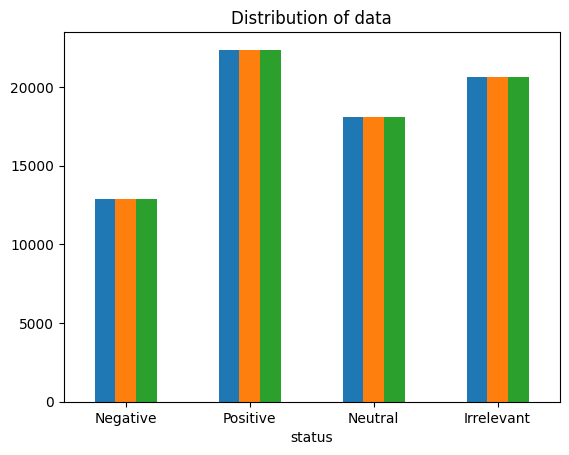

In [ ]:
ax=df.groupby('status').count().plot(kind='bar',title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive','Neutral','Irrelevant'],rotation=0)

In [ ]:
name, sentiment = list(df['name']),list(df['status'])

In [ ]:
# defining set contining all stopword in english
stop_words = set(stopwords.words('english'))


In [ ]:
def cleaning_stopword(text):
    words = word_tokenize(text)
    filtered_words = [word.lower() for word in words if word.lower() not in stop_words]
    cleaned_text = ' '.join(filtered_words)
    return cleaned_text


In [ ]:
#clening and removing the above stop word list from the tweet text
df['content']=df['content'].apply(lambda text: cleaning_stopword(text))
df['content'].head(5)

0      im getting borderlands murder ,
1                coming borders kill ,
2        im getting borderlands kill ,
3       im coming borderlands murder ,
4    im getting borderlands 2 murder ,
Name: content, dtype: object

In [ ]:
import string

In [ ]:
english_punctuations = string.punctuation
punctuation_list = english_punctuations

def cleaning_punctuations(content):
    translator = str.maketrans('', '', punctuation_list)
    return content.translate(translator)

df['content'] = df['content'].apply(lambda x: cleaning_punctuations(x))
df['content'].tail()

74677    realized windows partition mac like 6 years be...
74678    realized mac window partition 6 years behind n...
74679    realized windows partition mac 6 years behind ...
74680    realized windows partition mac like 6 years be...
74681    like windows partition mac like 6 years behind...
Name: content, dtype: object

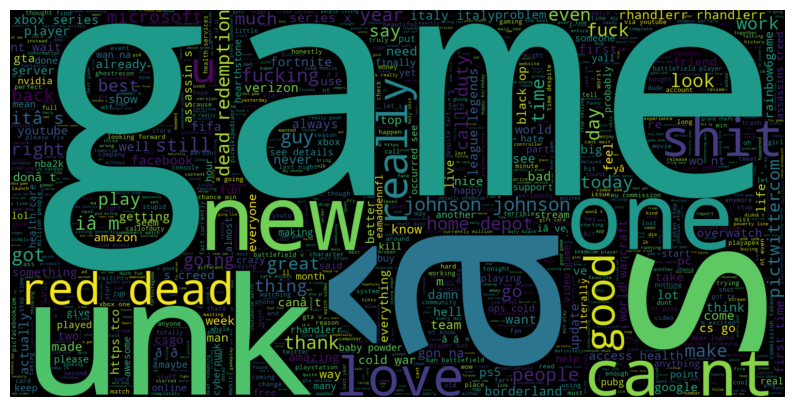

In [ ]:
#plot a cloud of word for negative tweets
data_neg = df['content'][:800000]

# Generate Word Cloud
plt.figure(figsize=(10, 10))
wc = WordCloud(max_words=1000, width=1600, height=800, colormap='viridis').generate(" ".join(data_neg))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
data= pd.read_csv('twitter_validation.csv',encoding=DATASET_ENCODING,names=DATASET_COLUMNS)
print(data.head())

    ids       name      status  \
0  3364   Facebook  Irrelevant   
1   352     Amazon     Neutral   
2  8312  Microsoft    Negative   
3  4371      CS-GO    Negative   
4  4433     Google     Neutral   

                                             content  
0  I mentioned on Facebook that I was struggling ...  
1  BBC News - Amazon boss Jeff Bezos rejects clai...  
2  @Microsoft Why do I pay for WORD when it funct...  
3  CSGO matchmaking is so full of closet hacking,...  
4  Now the President is slapping Americans in the...  


In [ ]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("english")
def clean(content):
    content = str(content).lower()
    content = re.sub('\[.*?\]','',content)
    content = re.sub('https?://\S+|www\.\S+','',content)
    content = re.sub('<.*?>+', '', content)
    content = re.sub('[%s]' % re.escape(string.punctuation), '', content)
    content = re.sub('\n','', content)
    content = re.sub('\w*\d\w', '', content)
    content = [word for word in content.split(' ') if word not in stop_words]
    content =" ".join(content)
    content = [stemmer.stem(word) for word in content.split(' ')]
    content =" ".join(content)
    return content
data['content'] = data['content'].apply(clean)

    

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#nltk.download('vader_lexicon')
sia=SentimentIntensityAnalyzer()
data["Positive"] = [sia.polarity_scores(i)['pos'] for i in data['content']]
data['Negative'] = [sia.polarity_scores(i)['neg'] for i in data['content']]
data["Neutral"] = [sia.polarity_scores(i)['neu'] for i in data['content']]

In [ ]:
data=data[['content','Positive','Negative','Neutral']]
print(data.tail())

                                               content  Positive  Negative  \
995  â­ï¸ toronto art cultur capit canada itâ w...     0.130     0.000   
996  actual good move tot bring viewersi one peopl ...     0.262     0.000   
997  today suck itâ time drink wine n play border...     0.126     0.347   
998          bought fraction microsoft today small win     0.432     0.000   
999  johnson  johnson stop sell talc babi powder us...     0.000     0.180   

     Neutral  
995    0.870  
996    0.738  
997    0.526  
998    0.568  
999    0.820  


In [ ]:
x=sum(data['Positive'])
y=sum(data["Negative"])
z=sum(data["Neutral"])
def sentiment_score(a,b,c):
    if(a>b) and (a>c):
        print("postive")
    elif (b>a) and (b>c):
        print("negaitve")
    else:
        print("Neutral")
sentiment_score(x,y,z)

Neutral


In [ ]:
print("postive: ",x)
print("negative: ",y)
print("Neutral: ",z)

postive:  171.56999999999977
negative:  153.66799999999998
Neutral:  673.7650000000006
